<a href="https://colab.research.google.com/github/Richofedhias/Tubes-Mesin/blob/main/1301208552_Richo_Fedhia_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

---



In [45]:
from google.colab import drive                  
import pandas as pd              
import seaborn as sns                  
import numpy as np                              
from sklearn.preprocessing import LabelEncoder  
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from numpy.linalg import norm

Membaca Data Set dari Google Drive

---



In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
df_train=pd.read_csv('gdrive/My Drive/Tubes mesin/kendaraan_train.csv')
df_test=pd.read_csv('gdrive/My Drive/Tubes mesin/kendaraan_test.csv')

Eksplorasi Data

---



In [6]:
df_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [7]:
df_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


Data Pre-Processing

---



1.   Cek Missing Value
2.   Replace Null Value
3.   Drop Coloumn
4.   Changing Data Type to integer



In [10]:
df_train.isnull().sum()  ## Untuk Melihat Jumlah Data yang Kosong

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [11]:
df_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [12]:
## Drop Coloumn Id dan kode daerah
df_train = df_train.drop(['id'], axis = 1)
df_train = df_train.drop(['Kode_Daerah'], axis = 1)

In [13]:
## Mendeskripsikian Coloumn yang ada di data train
df_train['Jenis_Kelamin'].describe()

count     271391
unique         2
top         Pria
freq      146678
Name: Jenis_Kelamin, dtype: object

In [14]:
df_train['Umur'].describe()

count    271617.000000
mean         38.844336
std          15.522487
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Umur, dtype: float64

In [15]:
df_train['Sudah_Asuransi'].describe()

count    271602.000000
mean          0.458778
std           0.498299
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Sudah_Asuransi, dtype: float64

In [16]:
df_train['Umur_Kendaraan'].describe()

count        271556
unique            3
top       1-2 Tahun
freq         142761
Name: Umur_Kendaraan, dtype: object

In [17]:
df_train['Kendaraan_Rusak'].describe()

count     271643
unique         2
top       Pernah
freq      137123
Name: Kendaraan_Rusak, dtype: object

In [18]:
df_train['Premi'].describe()

count    271262.000000
mean      30536.683472
std       17155.000770
min        2630.000000
25%       24398.000000
50%       31646.000000
75%       39377.750000
max      540165.000000
Name: Premi, dtype: float64

In [19]:
df_train['Kanal_Penjualan'].describe()

count    271532.000000
mean        112.021567
std          54.202457
min           1.000000
25%          29.000000
50%         132.000000
75%         152.000000
max         163.000000
Name: Kanal_Penjualan, dtype: float64

In [20]:
df_train['Lama_Berlangganan'].describe()

count    271839.000000
mean        154.286302
std          83.694910
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Lama_Berlangganan, dtype: float64

In [21]:
## Menghapus Nilai yang kosong
df_train = df_train[df_train['Jenis_Kelamin'].notna()] 
df_train = df_train[df_train['Umur'].notna()]
df_train = df_train[df_train['SIM'].notna()]
df_train = df_train[df_train['Sudah_Asuransi'].notna()]
df_train = df_train[df_train['Umur_Kendaraan'].notna()]
df_train = df_train[df_train['Kendaraan_Rusak'].notna()]
df_train = df_train[df_train['Premi'].notna()]
df_train = df_train[df_train['Kanal_Penjualan'].notna()]
df_train = df_train[df_train['Lama_Berlangganan'].notna()]

In [22]:
# df_train.loc[df_train['Jenis_Kelamin'] == 0]

In [23]:
# df_train.loc[df_train['Jenis_Kelamin'] != 0]

In [24]:
##  Memberikan Label ke Coloumn Jenis Kelamin
label_enc = LabelEncoder()
df_train["Jenis_Kelamin"] = label_enc.fit_transform(df_train["Jenis_Kelamin"])

In [25]:
## Memberikan Label Pada Coloumn Umur Kendaraan

umurkendaraan = {'< 1 Tahun': 1, '1-2 Tahun': 2, '> 2 Tahun':3}
df_train['Umur_Kendaraan'] = df_train['Umur_Kendaraan'].map(umurkendaraan)

In [26]:
## Memberikan Label Pada Coloumn Kendaraan Rusak
label_enc = LabelEncoder()
df_train["Kendaraan_Rusak"] = label_enc.fit_transform(df_train["Kendaraan_Rusak"])

In [27]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,1.0,1,1,28029.0,152.0,97.0,0
1,0,48.0,1.0,0.0,3,0,25800.0,29.0,158.0,0
3,1,58.0,1.0,0.0,2,1,2630.0,124.0,63.0,0
5,0,21.0,1.0,1.0,1,1,22735.0,152.0,171.0,0
8,1,20.0,1.0,1.0,1,1,30786.0,160.0,31.0,0


In [28]:

df_train['Sudah_Asuransi'] = df_train["Sudah_Asuransi"].astype(np.int64)

In [29]:
## Mengubah Tipe data object ke integer
df_train['Kendaraan_Rusak'] = df_train["Kendaraan_Rusak"].astype(np.int64)

In [30]:
## Mengubah Tipe data float ke integer
df_train['Premi'] = df_train["Premi"].astype(np.int64)

In [31]:
## Mengubah Tipe data float ke integer
df_train['Kanal_Penjualan'] = df_train["Kanal_Penjualan"].astype(np.int64)

In [32]:
## Mengubah Tipe data float ke integer
df_train['Lama_Berlangganan'] = df_train["Lama_Berlangganan"].astype(np.int64)

In [33]:
df_train.head()

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,1,1,1,28029,152,97,0
1,0,48.0,1.0,0,3,0,25800,29,158,0
3,1,58.0,1.0,0,2,1,2630,124,63,0
5,0,21.0,1.0,1,1,1,22735,152,171,0
8,1,20.0,1.0,1,1,1,30786,160,31,0


Tahap Corellation

---



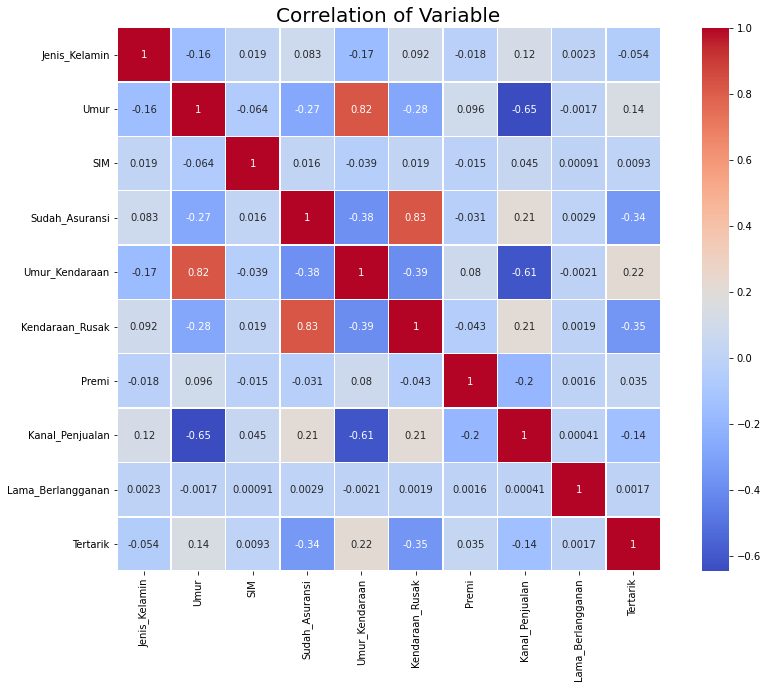

In [34]:
# Menampilkan Corelasi setiap variabel
plt.figure(figsize=(15,10))
plt.title('Correlation of Variable', y=1, size=20)

sns.heatmap(df_train.corr(method='spearman'), annot=True, linewidths=.5, square=True, cmap=plt.cm.coolwarm)

plt.show()

In [35]:
df_train.corr(method='spearman')

,Jenis_Kelamin,Umur,SIM,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
Jenis_Kelamin,1.000000,-0.157187,0.019403,0.082960,-0.166185,0.092292,-0.017926,0.123536,0.002290,-0.054428
Umur,-0.157187,1.000000,-0.064157,-0.269879,0.824851,-0.279919,0.095746,-0.646846,-0.001680,0.143103
SIM,0.019403,-0.064157,1.000000,0.015998,-0.038514,0.018526,-0.014595,0.044904,0.000914,0.009272
Sudah_Asuransi,0.082960,-0.269879,0.015998,1.000000,-0.378544,0.825627,-0.031281,0.210247,0.002933,-0.340579
Umur_Kendaraan,-0.166185,0.824851,-0.038514,-0.378544,1.000000,-0.394406,0.079819,-0.610479,-0.002113,0.220437
Kendaraan_Rusak,0.092292,-0.279919,0.018526,0.825627,-0.394406,1.000000,-0.042863,0.210667,0.001886,-0.353615
Premi,-0.017926,0.095746,-0.014595,-0.031281,0.079819,-0.042863,1.000000,-0.195694,0.001565,0.035284
Kanal_Penjualan,0.123536,-0.646846,0.044904,0.210247,-0.610479,0.210667,-0.195694,1.000000,0.000406,-0.140438
Lama_Berlangganan,0.002290,-0.001680,0.000914,0.002933,-0.002113,0.001886,0.001565,0.000406,1.000000,0.001728
Tertarik,-0.054428,0.143103,0.009272,-0.340579,0.220437,-0.353615,0.035284,-0.140438,0.001728,1.000000


Tahap Scalling

---



In [36]:
data = df_train[['Umur', 'Kendaraan_Rusak', 'Kanal_Penjualan', 'Lama_Berlangganan' ]] #Memakai Data yang akan dipakai untuk clustering
data_idx = data.index
scale = MinMaxScaler() #Scale dengan MinMax Scaler
data_scale = scale.fit_transform(data)
data_scale

array([[0.15384615, 1.        , 0.93209877, 0.30103806],
       [0.43076923, 0.        , 0.17283951, 0.51211073],
       [0.58461538, 1.        , 0.75925926, 0.183391  ],
       ...,
       [0.04615385, 1.        , 0.93209877, 0.74740484],
       [0.73846154, 1.        , 0.75925926, 0.89965398],
       [0.38461538, 0.        , 0.15432099, 0.11764706]])

In [37]:
df_cluster = pd.DataFrame(data = data_scale[:,:], columns=['Umur', 'Kendaraan_Rusak', 'Kanal_Penjualan', 'Lama_Berlangganan'])
df_cluster = df_cluster.set_index(data_idx)
df_cluster

,Umur,Kendaraan_Rusak,Kanal_Penjualan,Lama_Berlangganan
0,0.153846,1.0,0.932099,0.301038
1,0.430769,0.0,0.172840,0.512111
3,0.584615,1.0,0.759259,0.183391
5,0.015385,1.0,0.932099,0.557093
8,0.000000,1.0,0.981481,0.072664
...,...,...,...,...
285826,0.046154,1.0,0.932099,0.716263
285827,0.015385,1.0,0.932099,0.138408
285828,0.046154,1.0,0.932099,0.747405
285829,0.738462,1.0,0.759259,0.899654


In [38]:
pca = PCA(n_components=2) #Menggunakan method pca untuk merubah data menjadi 2 dimensi
principal = pca.fit_transform(df_cluster)
df_princ = pd.DataFrame(data=principal, columns=['pca1','pca2'])
df_princ

,pca1,pca2
0,-0.569861,-0.086912
1,0.639698,0.315400
2,-0.432023,0.243086
3,-0.598647,-0.147085
4,-0.615107,-0.194108
...,...,...
180106,-0.592612,-0.134026
180107,-0.597947,-0.146480
180108,-0.592664,-0.134071
180109,-0.401713,0.308499


In [39]:
df_princ.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pca1,180111.0,6.660993e-17,0.518269,-0.621792,-0.578258,0.320268,0.468622,0.785851
pca2,180111.0,1.546466e-16,0.345918,-0.559336,-0.192944,-0.114391,0.279084,1.007321


Clustering (K-Mean)

---



In [40]:
# Model Clustering Menggunakan KMeans

class K_Means:

    def __init__(self, n_clusters, max_iter=100, random_state=123):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state

    def init_centroids(self, X):                                                 # Inisialisasi awal centroid
        np.random.RandomState(self.random_state)                                 
        rand = np.random.permutation(X.shape[0])
        centroids = X[rand[:self.n_clusters]]
        return centroids

    def compute_centroids(self, X, labels):                                      # Mengacak letak centroid di satu cluster
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        for k in range(self.n_clusters):
            centroids[k, :] = np.mean(X[labels == k, :], axis=0)
        return centroids

    def compute_distance(self, X, centroids):                                    # Menghitung jarak antar data ke centroid
        distance = np.zeros((X.shape[0], self.n_clusters))
        for k in range(self.n_clusters):
            row_norm = norm(X - centroids[k, :], axis=1)
            distance[:, k] = np.square(row_norm)
        return distance

    def close_cluster(self, distance):                                           # Mendapatkan nilai cluster terdekat berdasarkan jarak
        return np.argmin(distance, axis=1)

    def compute_sse(self, X, labels, centroids):                                 # Menghitung nilai sum squered error untuk menghitung jarak centroid antar cluster
        distance = np.zeros(X.shape[0])
        for k in range(self.n_clusters):
            distance[labels == k] = norm(X[labels == k] - centroids[k], axis=1)
        return np.sum(np.square(distance))
    
    def fit(self, X):                                                            # generate Model KMeans
        self.centroids = self.init_centroids(X)
        initial = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.cluster_centers = X[initial]
        for i in range(self.max_iter):
            old_centroids = self.centroids
            distance = self.compute_distance(X, old_centroids)
            self.labels = self.close_cluster(distance)
            self.centroids = self.compute_centroids(X, self.labels)
            indices = [[i for i, l in enumerate(self.labels) if l == j]
                        for j in range(self.n_clusters)]
            X_by_cluster = [X[i] for i in indices]
            self.cluster_centers = [c.sum(axis=0) / len(c) for c in X_by_cluster]
            if np.all(old_centroids == self.centroids):
                break
        self.error = self.compute_sse(X, self.labels, self.centroids)
        self.inertia = sum(((self.cluster_centers[l] - x)**2).sum()
                            for x, l in zip(X, self.labels))
        return self
    
    def predict(self, X):
        distance = self.compute_distance(X, old_centroids)
        return self.close_cluster(distance)

Text(0.5, 1.0, 'Cluster data')

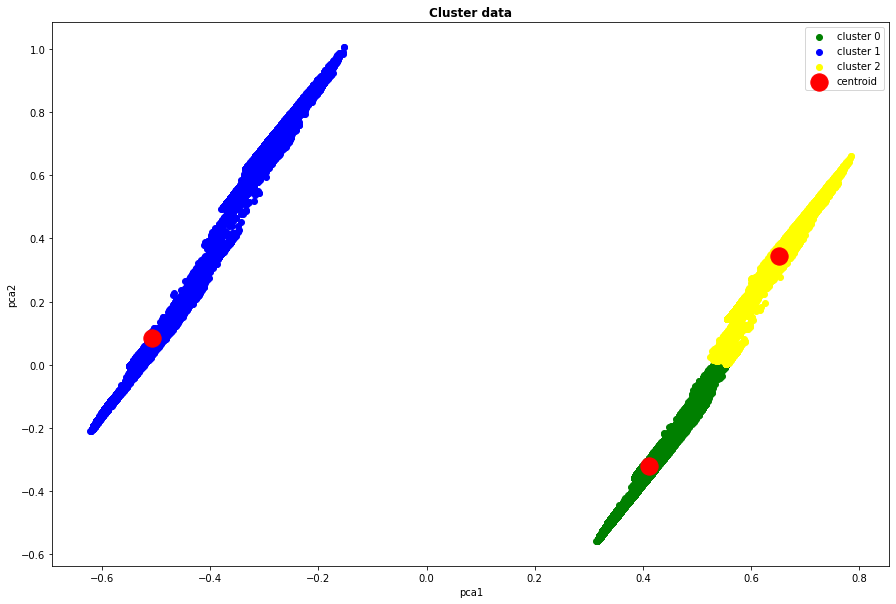

In [46]:
# Mengubah dataframe ke array
X = np.array(df_princ)

K = 3
km = K_Means(n_clusters=K, max_iter=100)
km.fit(X)
centroids = km.centroids

colors = ['green', 'blue', 'yellow', 'purple', 'grey']

# Plot Cluster
fig, ax = plt.subplots(figsize=(15, 10))
for i in range(K):
    
    plt.scatter(X[km.labels == i, 0], X[km.labels == i, 1],
                c=colors[i], label=('cluster '+str(i)))
    

plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=300,
                c='r', label='centroid')



plt.legend()
plt.xlabel(df_princ.columns[0])
plt.ylabel(df_princ.columns[1])
plt.title('Cluster data', fontweight='bold')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


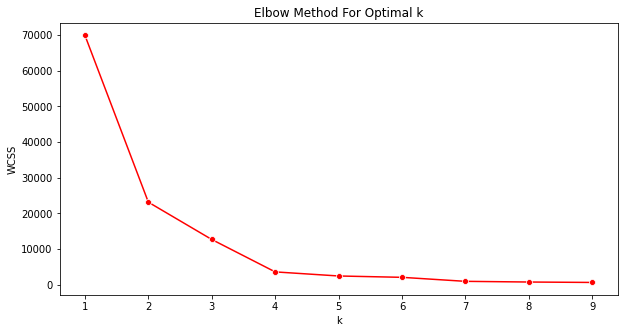

In [47]:
wcss = []
K = list(range(1,10))
for k in K:
    kmeans = K_Means(n_clusters = k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia)
plt.figure(figsize=(10,5))
sns.lineplot(K, wcss, marker='o', color='red')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

In [49]:
#algo untuk mencari nilai k terbaik
sse = []
K = range(1,10)
for k in K:
    kmeanModel = K_Means(n_clusters=k)
    sse.append(kmeanModel.fit(z))

In [51]:


print(silhouette_score(z, labels=km.labels))

0.7065991635666726


In [52]:
df_train.to_csv('1301208552_RichoFedhiaS.csv', index=False)